# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Problem Statement

* With all digital products,the emergence of electronic news portals also known as E-news is fast replacing traditional newspapers. E-news portals offer varied advantages of traditional newspapers including faster access to the content and the ability to utilize difference technologies such as audio,graphics,video, and other interactive elements. E-news seeking to grow it subcriber base actions and interest of visitors to its website. Express is an online news portal.
* Executives of the company believe that the new website is challenged when it comes to outline and recommended content to keep customs engaged long enough to make a decision to subscribe and this has cause a decline in new monthly subscription.


## Objectives
* In order to resolve this, the E-news Express has created a new landing page and wants to test its effectiveness by employing the A/B testing method. The data science team of the company has selected 100 random visitors and divided them into two equal groups with one group as control and the other as treatment group.
* The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group)
* The current task is to explore the data and perform a statistical analysis (at a significance level of 5%)  to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions.
* Do the users spend more time on the new landing  page than on the existing landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Is the conversion and preferred language are independent or related?
* Is the time spent on the new page same for the different language users?




## Data Dictionary 
This data contains information regarding the interaction of users in both groups with the two versions of the landing page

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Reading the Data into a DataFrame

In [5]:
db = pd.read_csv('abtest.csv')

In [6]:
db

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


### Observation
The Dataset has 6 columns as mentioned in the Data Dictionary

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

### Data overview

The first step in getting the overview of the data is to;
* Run the first five rows and last five rows of the data set
* Getting an imformed imformations about the dataset which is the rows and colums
* Running checks on the data type of the columns to ensure data are store in preferred format
* Finally we check the statistical summary of the dataset

### Working on the first five rows

In [4]:
# first 5 rows of the dataset
db.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


### Working on the last five rows

In [5]:
# viewing the last 5 rows of the dataset
db.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
# viewing the shape of the dataset
db.shape

(100, 6)

### Observation On Shape
From the dataset, we have 100 row and 6 columns

In [7]:
# viewing the statistical summary of the the dataset
db.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


### Observation for Describe
Users take an average time of 5.37, minimium time of 3.88 and maximium time of 10.7 spent on the page  

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.2+ KB


### Observation on Info
The dataset are (int64, object and float64),There is no error on the dataset 

In [9]:
# checking for missing values
db.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Observation on Missing Values
There is no missing values in the dataset

In [10]:
db.duplicated(subset = None, keep = 'first')

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

### Observation on Duplicates 
There are no duplicates in the dataset

# Univariate Analysis

## Group

In [13]:
db['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

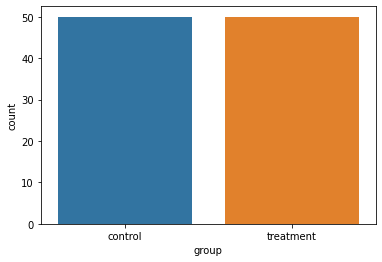

In [14]:
sns.countplot(data = db, x = 'group')
plt.show()

### Observation on group
From the above, both control and treatment has the same count which is 50

## Landing Page

In [15]:
db['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

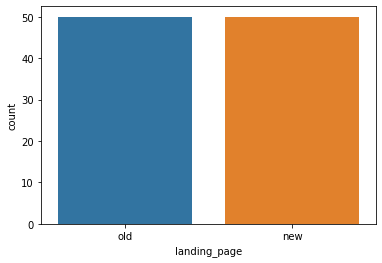

In [22]:
sns.countplot(data = db, x = 'landing_page')
plt.show()

### Observation on Landing page
Both old and new has the same count in the landing page

## Time Spent On The Page

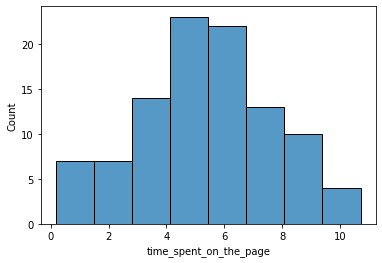

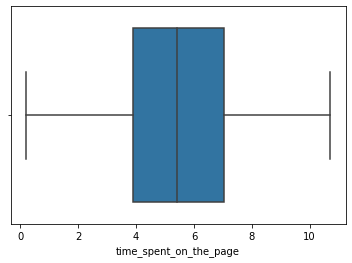

In [11]:
sns.histplot(data = db, x = 'time_spent_on_the_page' )
plt.show()
sns.boxplot(data = db, x = 'time_spent_on_the_page')
plt.show()

### Observation on time spent on the page
more than 20 users spend 4 to 6.8 minutes on the page

## Converted

In [23]:
db['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

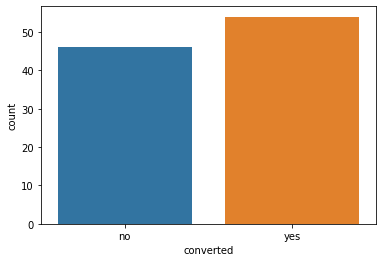

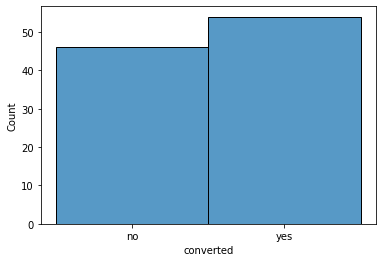

In [24]:
sns.countplot(data = db, x = 'converted')
plt.show()
sns.histplot(data = db, x = 'converted')
plt.show()

### Observation on converted
users who said yes are more than 50 whiles users who said no are around 46.

## Language Preferred

In [25]:
db['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

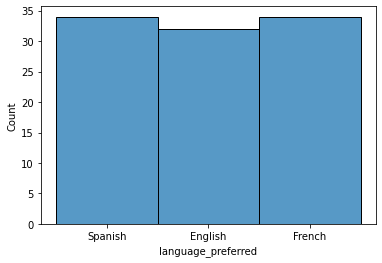

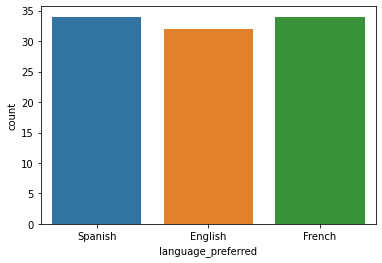

In [26]:
sns.histplot(data = db, x = 'language_preferred')
plt.show()
sns.countplot(data = db, x = 'language_preferred')
plt.show()

### Observation on language preferred
users who preferred English are less than those who preferred Spanish and French

# Bivariate Analysis

## Landing Page vs Time Spent On The Page

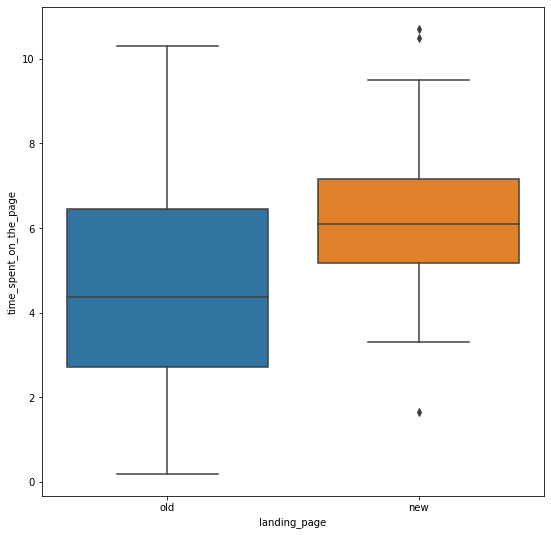

In [17]:
plt.figure(figsize=(9,9))
sns.boxplot(data = db, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()

### Observation on landing page and time spent on the page
Average time spent on the new landing page is 6 which is more than that of the old landing page 4.2 

## Conversion Status vs Time Spent On The Page

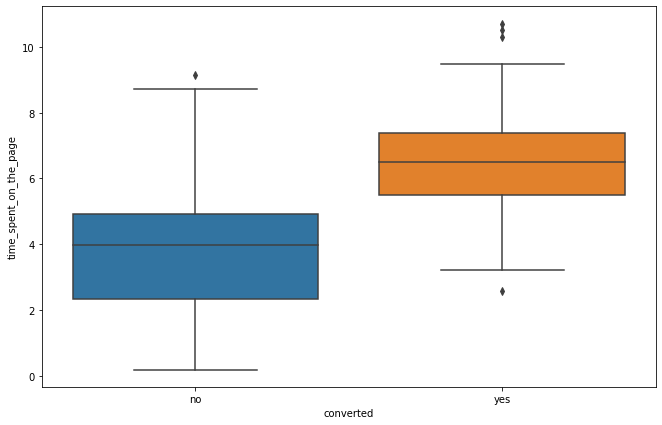

In [10]:
plt.figure(figsize=(11,7))
sns.boxplot(data = db, x = 'converted', y = 'time_spent_on_the_page')
plt.show()

### Observation on conversion vrs time spent on the page
Users that said yes to conversion is higher (almost 7mins on average)than users who said no (4 mins on average) time spent on the page

## Language Preferred vs Time Sent On The Page

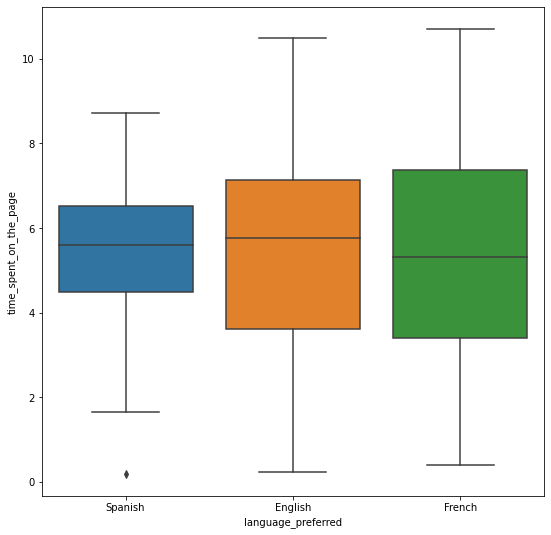

In [12]:
plt.figure(figsize=(9,9))
sns.boxplot(data = db, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

### Observation on language preferred vs time spent on page
The maximuim time spent on the page is in french(12) followed by English(11) and lastly Spanish (about 9)

## Group vs Time Spent On The Page

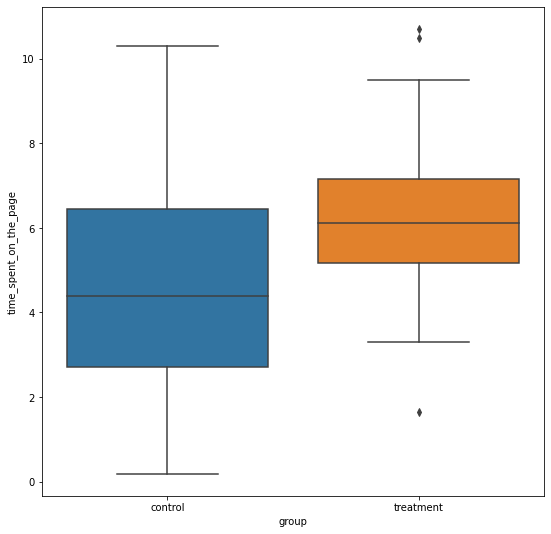

In [15]:
plt.figure(figsize=(9,9))
sns.boxplot(data = db, x = 'group', y = 'time_spent_on_the_page')
plt.show()

### Observation 
control group has the maximium time spent on the page (above 10) but treatment has outliers which is more or higher  than control group

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

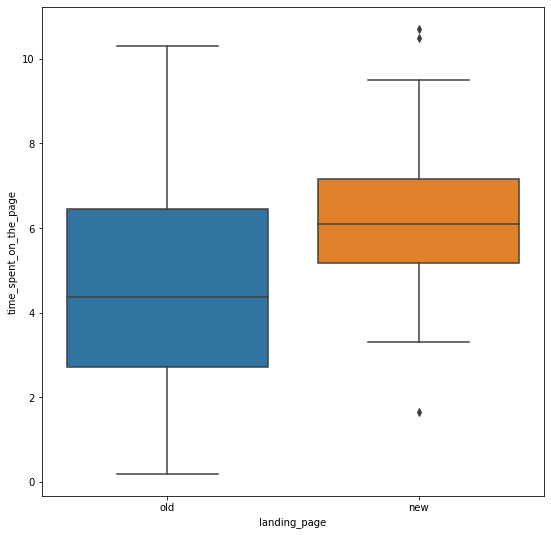

In [7]:
plt.figure(figsize=(9,9))
sns.boxplot(data = db, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0$: $U_0$ = 0
    
$H_a$: $U_0$ > 0


### Step 2: Select Appropriate test

We are dealing with two population means from two independent population with one tail test where the population standard deviation is unknown so we use the two independent sample t-test

### Step 3: Decide the significance level

we use 0.05 as the the significance level is given as 5% in the problem statement

### Step 4: Collect and prepare data

In [8]:
# working on new landing page
time_spent_on_new = db[db['landing_page'] == 'new']['time_spent_on_the_page']

# working on old landing page
time_spent_on_old = db[db['landing_page'] == 'old']['time_spent_on_the_page']

In [9]:
print('the sample standard deviation spent on the new landing page is ', round(time_spent_on_new.std(),2))
print('the sample standard deviation spent on the old landing page is ', round(time_spent_on_old.std(),2))

the sample standard deviation spent on the new landing page is  1.82
the sample standard deviation spent on the old landing page is  2.58


observation:

### Step 5: Calculate the p-value

In [14]:
# importing the library
from scipy.stats import ttest_ind
test_st, p_value = ttest_ind(time_spent_on_new, time_spent_on_old, equal_var = False, alternative = 'greater')
print('p-value is ', p_value)

p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [16]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis


### Step 7:  Draw inference

From the time we performed the visual analysis,
* We realised that time spent on old landing page is above 10mins which was more than time spent on new landing page.
* Again the standard deviation spend on the old landing page is 2.58 which is higher than the new landing page.

Therefore,
We reject the null hypothesis because there is not enough evidence to support the claim.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

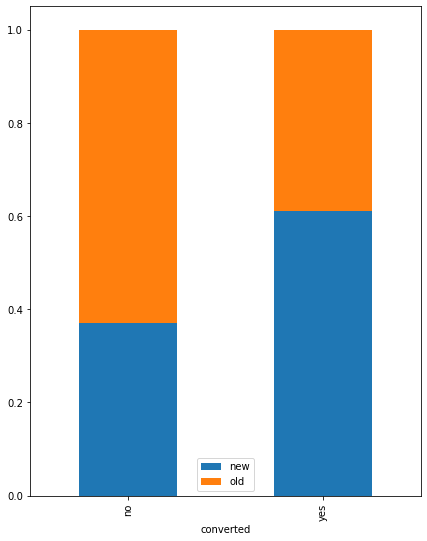

In [10]:
pd.crosstab(db['converted'], db['landing_page'], normalize = 'index').plot(kind = 'bar', figsize=(7,9), stacked = True)
plt.legend()
plt.show()

### step 1: Defining the null and alternative hypothesis

$H_0:$ = $U_0$ = 0

$H_a:$ = $U_0$ > 0

### step 2: Selecting the right test

It is a two population proportion , with one-tail test concerning two independent population. so we use the two proporion z-test

### step 3 working on the significant level

we will use a = 0.05

### step 4: collecting and preparing the data

In [13]:
# calculating the number of converted users in the treatment group
new_converted = db[db['group']== 'treatment']['converted'].value_counts()['yes']
# calculating the number of converted users in the control group
old_converted = db[db['group']== 'control']['converted'].value_counts()['yes']

ne_control = db.group.value_counts()['control']
ne_treatment = db.group.value_counts()['treatment']
print('The number of users served the new and old pages are {0} and {1} respectively'.format(ne_control, ne_treatment))

The number of users served the new and old pages are 50 and 50 respectively


### step 5: calculating the p-value

In [24]:
from statsmodels.stats.proportion import proportions_ztest

# writing code to calculate the P-value 
test_stats, p_value = proportions_ztest([new_converted, old_converted], [ne_treatment, ne_control], alternative = 'larger')

print('The p-value is ', p_value)

The p-value is  0.008026308204056278


### step 6: compare the p-value with $\alpha$

In [29]:
if p_value < 0.05:
    print(f'since p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'since p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')


since p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Draw Inference 
* From the time we performed the visual analysis to collecting the data,it can be seen that the number of users served new and old pages are the same, which is 50 for new and 50 for old. 
* Also, since the p value is less than the level of significance, it is a clear prove for us to reject the Null hypothesis.
In Conclusion,
Because there is no enough evidence to support the claim that, the conversion rate for the new page is greater than the conversion rate for the old page, we reject the Null hypothesis. 

### 3. Is the conversion and preferred language are independent or related?

### Perform visual Analysis

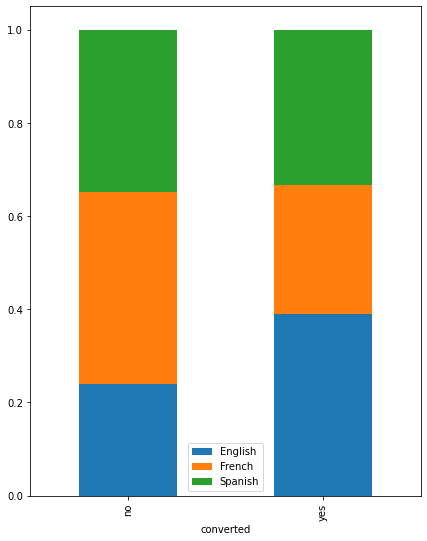

In [12]:
pd.crosstab(db['converted'],db['language_preferred'], normalize = 'index').plot(kind = 'bar', figsize=(7,9), stacked = True)
plt.legend()
plt.show()

### step 1: Defining the null and alternative hypothesis

$H_0:$ = converted status depend on preferred language. 

$H_a:$ = converted status is independent on preferred language

### step 2: Selecting the right test

This concerns test of independence in two categorical variables between the converted status and preferred language therefore, we use the chi-square test of independence

### step 3: Working on the significant level

we will use $\alpha$ = 0.05 as the significant level

### step 4: Collecting and preparing the data

In [14]:
c_table = pd.crosstab(db['converted'], db['language_preferred'])

c_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### step 5: Calculating the p-value 

In [15]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, exp_freq = chi2_contingency(c_table)
print('p_value is', p_value)

p_value is 0.21298887487543447


### step 6: comparing the p-value with  $\alpha$

In [16]:
if p_value < 0.05:
    print(f'Since the p_value {p_value} is less than the level of significant, we reject the Null hypothesis')
else:
    print(f'Since the p_value {p_value} is greater than the level of significant, we fail to reject the Null hypothesis')

Since the p_value 0.21298887487543447 is greater than the level of significant, we fail to reject the Null hypothesis


### Draw Inference
From the point where we calculated the p-value, we saw that p-value is geater than the level of significance. with this, there is enough evidence that converted status depend on the preferred language. So there is a relationship.

## 4. Is the time spent on the new page same for the different language users?

### step 1: performing visual analysis

In [21]:
db_new = db[db['landing_page'] == 'new']

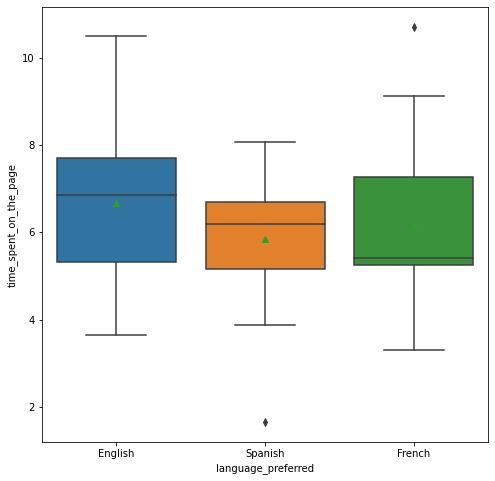

In [22]:
plt.figure(figsize = (8,8))
sns.boxplot(x= 'language_preferred', y= 'time_spent_on_the_page', showmeans = True, data = db_new)
plt.show()

In [25]:
db_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### step 2: Defininng the Null and Alternative hypothesis

$H_0:$ = $U_1:$ = $U_2:$ = $U_3:$

$H_0:$ = At least one of the language preferred are different from the rest

### step 3: selecting the right test

This is a problem on three population mean and for that, we will use the ANOVA test

### step 4: working on the significant level 

We will use 0.05 as the significant level

### step 5: collecting and preparing the data

In [30]:
time_spent_English = db_new[db_new['language_preferred']== 'English']['time_spent_on_the_page']
time_spent_French = db_new[db_new['language_preferred']== 'French']['time_spent_on_the_page']
time_spent_Spanish = db_new[db_new['language_preferred']== 'Spanish']['time_spent_on_the_page']

time_spent_English
time_spent_French
time_spent_Spanish

2     4.40
4     4.75
12    5.86
15    6.27
24    6.18
38    1.65
42    7.16
47    7.23
48    8.08
52    6.47
54    6.41
68    6.70
77    3.88
82    5.74
95    5.15
97    7.07
98    6.20
Name: time_spent_on_the_page, dtype: float64

### step 6: calculating the p_value

In [33]:
from scipy.stats import levene
test_stats, p_value = stats.levene(time_spent_English, time_spent_French, time_spent_Spanish)
print('p_value is', p_value)

p_value is 0.46711357711340173


### step 7: compare the p_value with $\alpha$

In [34]:
if p_value < 0.05:
    print(f'since p_value {p_value} is less than the level of significance, we reject the Null hypothesis')
else:
    print(f'since p_value {p_value} is greater than the level of significance, we fail to reject the Null hypothesis')

since p_value 0.46711357711340173 is greater than the level of significance, we fail to reject the Null hypothesis


### step 8: in conclusion

From the point where we collected and prepared data, we saw that p-value is geater than the level of significance. with this, there is enough evidence that time spent for the difference language users. So there is a relationship, therefore we fail to reject the Null hypothesis.

## Conclusion 

We found out that;
* Users did not spend more time on the new landing page than the existing landing page.
* Again we found out the conversion rate for the new page is not greater than that of the existing page.
* We then realised that the converted status has a relationship with the preferred language.
* Finally, time spent on the new page is the same with all the preferred language.

## Recommendation
* Will recommend that the old and new page be fused or used simultaneously since the rate of time spent on the old page is equally good.
* The new landing page need to be updated frequently to march current trends so that it will attract more users.
* The new landing page is not that effective and competitive enough and for that matter, the Executives need to pay close attention to that.

___